In [4]:
import numpy as np

def compare_npy_dicts(path1, path2):
    dict1 = np.load(path1, allow_pickle=True).item()
    dict2 = np.load(path2, allow_pickle=True).item()
    if dict1.keys() != dict2.keys():
        return False
    for key in dict1:
        if not np.array_equal(dict1[key], dict2[key]):
            return False
    return True

def print_npy_dict(path1):
    dict1 = np.load(path1, allow_pickle=True) # .item()
    print(dict1)


In [5]:
data_1 = [
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[02_08]/1/results/num_steps_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[02_08]/1/results/pg_cw_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[02_08]/1/results/pg_noise_multiplier_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[02_08]/1/results/pg_sample_rates_list.npy",
    ]

data_2 = [
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[04_06]/1/results/num_steps_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[04_06]/1/results/pg_cw_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[04_06]/1/results/pg_noise_multiplier_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[04_06]/1/results/pg_sample_rates_list.npy",
    ]

data_3 = [
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[06_04]/1/results/num_steps_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[06_04]/1/results/pg_cw_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[06_04]/1/results/pg_noise_multiplier_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[06_04]/1/results/pg_sample_rates_list.npy",
    ]

data_4 = [
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[08_019999999999999996]/1/results/num_steps_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[08_019999999999999996]/1/results/pg_cw_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[08_019999999999999996]/1/results/pg_noise_multiplier_list.npy",
    "./exp_mia_final_clipping_fixed_split/None/bloodmnist/bloodmnist_[80_320]_[08_019999999999999996]/1/results/pg_sample_rates_list.npy",
    ]

data_all = [data_1, data_2, data_3, data_4]
for dat in data_all:
    for file in dat:
        print_npy_dict(file)
    print("-----")

[[940]]
[[None]]
[[np.float64(0.6620044708251953) np.float64(0.6620044708251953)]]
[[0.02127659574468085 0.02127659574468085]]
-----
[[940]]
[[None]]
[[np.float64(0.7466255866837235) np.float64(0.7466255866837235)]]
[[0.02127659574468085 0.02127659574468085]]
-----
[[940]]
[[None]]
[[np.float64(0.8311618126082687) np.float64(0.8311618126082687)]]
[[0.02127659574468085 0.02127659574468085]]
-----
[[940]]
[[None]]
[[np.float64(0.9157687801444665) np.float64(0.9157687801444665)]]
[[0.02127659574468085 0.02127659574468085]]
-----


Calculated effective privacy parameter (mu): 0.3162


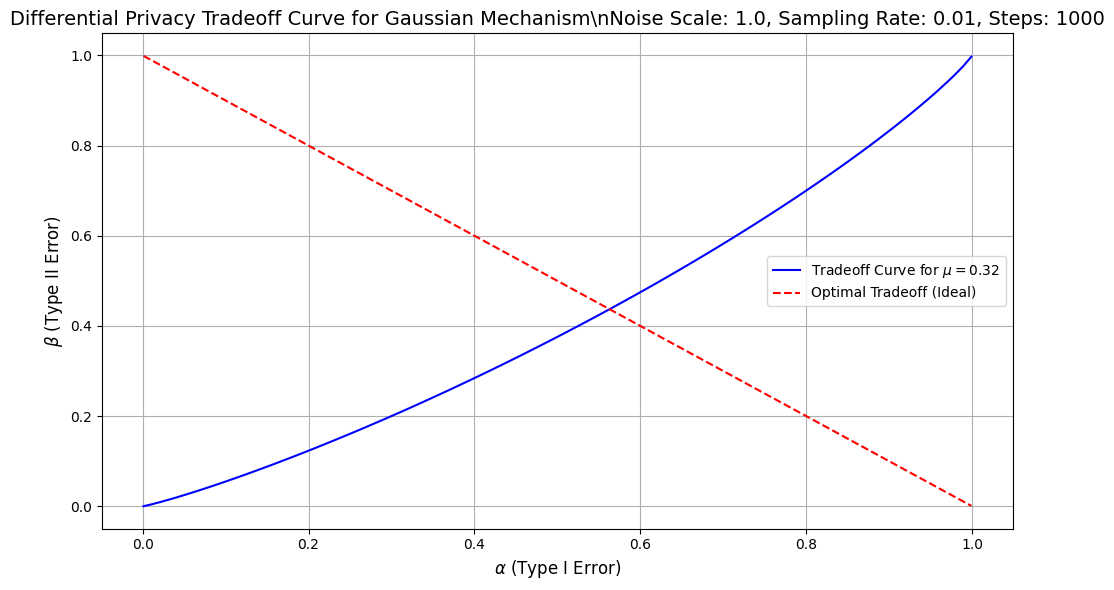

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

def plot_dp_tradeoff(noise_scale, sampling_rate, num_steps):
    """
    Generates a plot of the tradeoff function for Gaussian differential privacy.

    Args:
        noise_scale (float): The noise scale parameter (sigma).
        sampling_rate (float): The sampling rate (q).
        num_steps (int): The number of steps (T).
    """

    # Calculate the effective privacy parameter mu
    mu_squared = num_steps * (sampling_rate**2) / (noise_scale**2)
    mu = np.sqrt(mu_squared)
    print(f"Calculated effective privacy parameter (mu): {mu:.4f}")

    # Define the tradeoff function
    def tradeoff_function(alpha, mu):
        # Inverse CDF of the standard normal distribution for alpha
        inv_phi_alpha = norm.ppf(alpha)
        
        # CDF of the standard normal distribution for (inv_phi_alpha - mu)
        beta = norm.cdf(inv_phi_alpha - mu)
        return beta

    # Generate a range of alpha values from 0.001 to 0.999
    alpha_values = np.linspace(0.001, 0.999, 100)

    # Calculate the corresponding beta values
    beta_values = [tradeoff_function(a, mu) for a in alpha_values]

    # Create a DataFrame for the data
    data = pd.DataFrame({'alpha': alpha_values, 'beta': beta_values})

    # Plot the tradeoff curve
    plt.figure(figsize=(10, 6))
    plt.plot(data['alpha'], data['beta'], label=f'Tradeoff Curve for $\\mu = {mu:.2f}$', color='blue')
    plt.plot(data['alpha'], 1 - data['alpha'], label='Optimal Tradeoff (Ideal)', linestyle='--', color='red')
    plt.title(f'Differential Privacy Tradeoff Curve for Gaussian Mechanism\\nNoise Scale: {noise_scale}, Sampling Rate: {sampling_rate}, Steps: {num_steps}', fontsize=14)
    plt.xlabel('$\\alpha$ (Type I Error)', fontsize=12)
    plt.ylabel('$\\beta$ (Type II Error)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_dp_tradeoff(noise_scale=1.0, sampling_rate=0.01, num_steps=1000)